In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to your extracted stock CSV files
data_path = r"C:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\data\yfinance_data\Data"

# Choose a stock file — example: AAPL.csv
file_name = "AAPL.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(os.path.join(data_path, file_name))

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date (important for time series)
df = df.sort_values("Date")

# Set Date as index (optional but recommended)
df = df.set_index("Date")

# Display the first few rows
print(df.head())


               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800


In [6]:
# 2. CALCULATE TECHNICAL INDICATORS (TA-Lib or Manual)
# -------------------------------------------------
# If TA-Lib is available:
try:
    import talib

    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

    macd, macd_signal, macd_hist = talib.MACD(df['Close'])
    df['MACD'] = macd
    df['MACD_signal'] = macd_signal
    df['MACD_hist'] = macd_hist

except Exception:
    print("\nTA-Lib not installed — using manual implementations.\n")

In [3]:
# --- Manual SMA / EMA ---
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

In [6]:
# --- Manual RSI ---
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

In [7]:
# --- Manual MACD ---
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_hist'] = df['MACD'] - df['MACD_signal']


In [11]:
df['Daily_Return'] = df['Daily_Return'].fillna(0)  # Fill NaN with 0
df['Volatility_20'] = df['Volatility_20'].fillna(0)  # Fill NaN with 0
df['Sharpe_20'] = df['Sharpe_20'].fillna(0)  # Fill NaN with 0

In [12]:
print(df[['Close', 'Daily_Return', 'Volatility_20', 'Sharpe_20']].head(30))  # Display the first 30 rows

               Close  Daily_Return  Volatility_20  Sharpe_20
Date                                                        
2009-01-02  2.721686      0.000000       0.000000   0.000000
2009-01-05  2.836553      0.042204       0.000000   0.000000
2009-01-06  2.789767     -0.016494       0.000000   0.000000
2009-01-07  2.729484     -0.021609       0.000000   0.000000
2009-01-08  2.780169      0.018570       0.000000   0.000000
2009-01-09  2.716589     -0.022869       0.000000   0.000000
2009-01-12  2.659007     -0.021196       0.000000   0.000000
2009-01-13  2.630514     -0.010716       0.000000   0.000000
2009-01-14  2.559135     -0.027135       0.000000   0.000000
2009-01-15  2.500652     -0.022853       0.000000   0.000000
2009-01-16  2.469163     -0.012592       0.000000   0.000000
2009-01-20  2.345299     -0.050164       0.000000   0.000000
2009-01-21  2.484158      0.059207       0.000000   0.000000
2009-01-22  2.650008      0.066763       0.000000   0.000000
2009-01-23  2.650008    

In [14]:
# Add metrics to DataFrame
df['Daily_Return'] = returns.fillna(0)  # Fill NaN with 0 for Daily Return
df['Volatility_20'] = df['Daily_Return'].rolling(20).std().fillna(0) * np.sqrt(252)  # Fill NaN with 0
df['Sharpe_20'] = df['Daily_Return'].rolling(20).mean().fillna(0) / df['Daily_Return'].rolling(20).std().fillna(0)  # Fill NaN with 0

# Display the updated DataFrame with metrics
print(df[['Close', 'Daily_Return', 'Volatility_20', 'Sharpe_20']].head(30))  # Show the first 30 rows

               Close  Daily_Return  Volatility_20  Sharpe_20
Date                                                        
2009-01-02  2.721686      0.000000       0.000000        NaN
2009-01-05  2.836553      0.042204       0.000000        NaN
2009-01-06  2.789767     -0.016494       0.000000        NaN
2009-01-07  2.729484     -0.021609       0.000000        NaN
2009-01-08  2.780169      0.018570       0.000000        NaN
2009-01-09  2.716589     -0.022869       0.000000        NaN
2009-01-12  2.659007     -0.021196       0.000000        NaN
2009-01-13  2.630514     -0.010716       0.000000        NaN
2009-01-14  2.559135     -0.027135       0.000000        NaN
2009-01-15  2.500652     -0.022853       0.000000        NaN
2009-01-16  2.469163     -0.012592       0.000000        NaN
2009-01-20  2.345299     -0.050164       0.000000        NaN
2009-01-21  2.484158      0.059207       0.000000        NaN
2009-01-22  2.650008      0.066763       0.000000        NaN
2009-01-23  2.650008    

In [ ]:
import os
import pandas as pd
import numpy as np
import pynance as pn

# Path to your extracted stock CSV files
data_path = r"C:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\data\yfinance_data\Data"

# Choose a stock file — example: AAPL.csv
file_name = "AAPL.csv"

# Load the CSV into a DataFrame with error handling
try:
    df = pd.read_csv(os.path.join(data_path, file_name))
except FileNotFoundError:
    print(f"Error: The file {file_name} was not found in the specified path.")
    exit(1)
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
    exit(1)
except pd.errors.ParserError:
    print("Error: There was a parsing error.")
    exit(1)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=["Date"])

# Sort by date (important for time series)
df = df.sort_values("Date")

# Set Date as index (optional but recommended)
df = df.set_index("Date")

# Check if the Close column exists
if 'Close' not in df.columns:
    raise ValueError("The 'Close' column is not present in the DataFrame.")

# Calculate daily returns and other metrics
try:
    import pynance as pn
    # Attempt to compute daily returns using the correct method
    if hasattr(pn, 'returns') and hasattr(pn.returns, 'daily'):
        returns = pn.returns.daily(df['Close'])  # Check the correct function according to PyNance
    else:
        raise AttributeError("Function to compute daily returns not found in PyNance.")
except Exception as e:
    print("\nPyNance not installed or function unavailable — using manual metrics.\n")
    print(f"Error: {str(e)}")
    
    # Calculate returns manually
    returns = df['Close'].pct_change()  # Ensure df is defined here

# Add metrics to DataFrame
df['Daily_Return'] = returns
df['Volatility_20'] = df['Daily_Return'].rolling(20).std() * np.sqrt(252)
df['Sharpe_20'] = df['Daily_Return'].rolling(20).mean() / df['Daily_Return'].rolling(20).std()

# Display the updated DataFrame with metrics
print(df[['Close', 'Daily_Return', 'Volatility_20', 'Sharpe_20']].head())


PyNance not installed or function unavailable — using manual metrics.

Error: Function to compute daily returns not found in PyNance.
               Close  Daily_Return  Volatility_20  Sharpe_20
Date                                                        
2009-01-02  2.721686           NaN            NaN        NaN
2009-01-05  2.836553      0.042204            NaN        NaN
2009-01-06  2.789767     -0.016494            NaN        NaN
2009-01-07  2.729484     -0.021609            NaN        NaN
2009-01-08  2.780169      0.018570            NaN        NaN


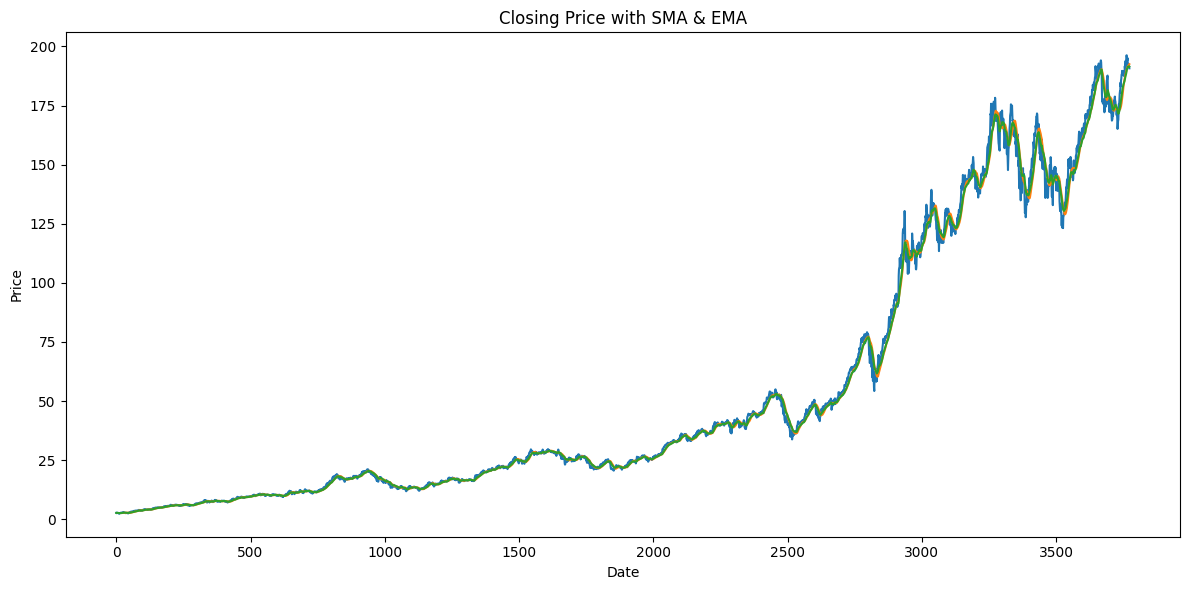

In [4]:
# Import the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Ensure plt is imported

# Path to your extracted stock CSV files
data_path = r"C:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\data\yfinance_data\Data"

# Choose a stock file — example: AAPL.csv
file_name = "AAPL.csv"

# Load the CSV into a DataFrame with error handling
df = pd.read_csv(os.path.join(data_path, file_name))
# --- Manual SMA / EMA ---
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
# 4. VISUALIZATIONS
# -------------------------------------------------
# 1 — Price + SMA + EMA
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.plot(df.index, df['SMA_20'])
plt.plot(df.index, df['EMA_20'])
plt.title("Closing Price with SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig(r"C:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\plots/tachnical\APPL_SMA&EMA.png")
plt.show()

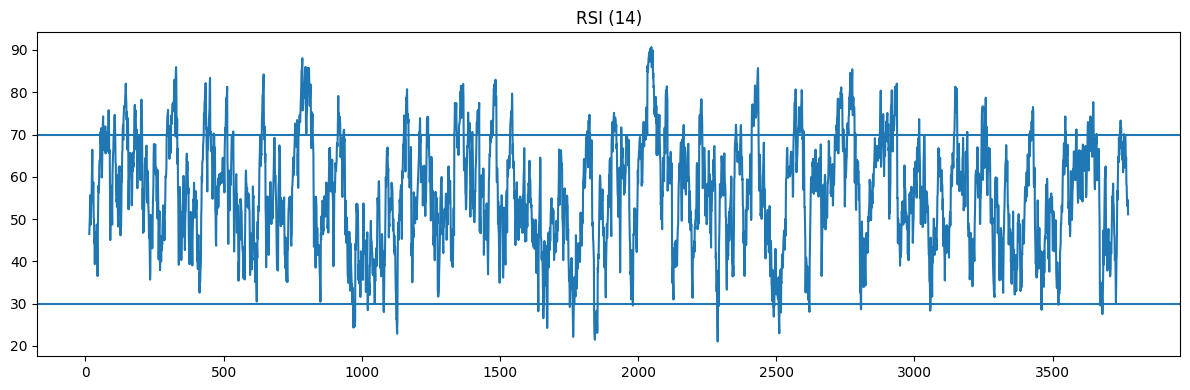

In [8]:
# 2 — RSI
plt.figure(figsize=(12,4))
plt.plot(df.index, df['RSI_14'])
plt.title("RSI (14)")
plt.axhline(70)
plt.axhline(30)
plt.tight_layout()
plt.savefig(r"C:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\plots/tachnical\APPL_RSl.png")
plt.show()

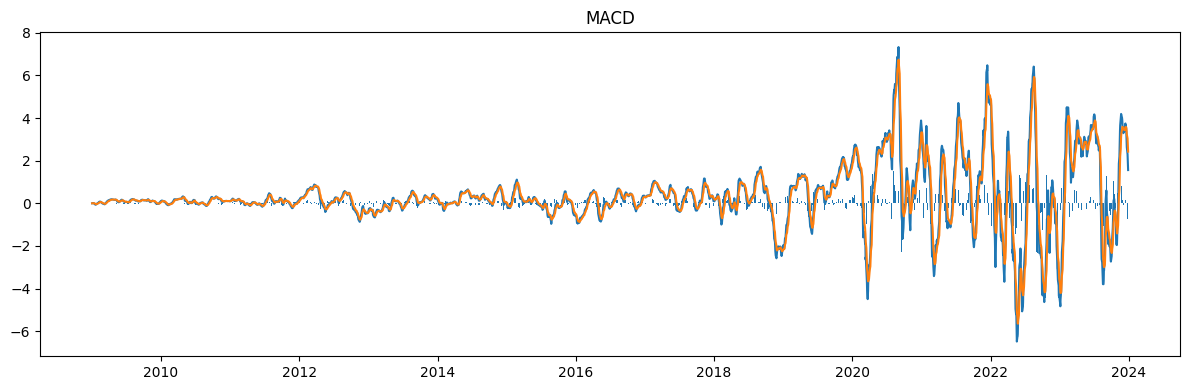

<Figure size 640x480 with 0 Axes>

In [21]:
# 3 — MACD
plt.figure(figsize=(12,4))
plt.plot(df.index, df['MACD'])
plt.plot(df.index, df['MACD_signal'])
plt.bar(df.index, df['MACD_hist'])
plt.title("MACD")
plt.tight_layout()
plt.show()
plt.savefig(r"C:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\plots/tachnical\APPL_MACD.png")

In [14]:
# 5. FINAL — EXPORT CLEANED DATA FOR DASHBOARD
# -------------------------------------------------

output_file = r"c:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\data\yfinance_data\Data/AAPL_processed.csv"
df.to_csv(output_file)

print("\n=== PROCESS COMPLETED ===")
print(f"Cleaned dataset saved to: {output_file}")


=== PROCESS COMPLETED ===
Cleaned dataset saved to: c:\Users\hp\Documents\nova-financial-news-sentiment\Nova-financial-news-sentiment-week1\data\yfinance_data\Data/AAPL_processed.csv
